In [1]:
import cmath
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N=1000

In [3]:
# Geração dos símbolos
Symbols_TX = np.random.randint(0, 4, size=N)

In [4]:
# Modulador
def modulator(Symbols_TX):
    if Symbols_TX == 0:
        return complex(-1/cmath.sqrt(2),-1/cmath.sqrt(2))
    if Symbols_TX == 1:
        return complex(-1/cmath.sqrt(2),1/cmath.sqrt(2))
    if Symbols_TX == 2:
        return complex(1/cmath.sqrt(2),-1/cmath.sqrt(2))
    if Symbols_TX == 3:
        return complex(1/cmath.sqrt(2),1/cmath.sqrt(2))

In [5]:
# Demodulador
def demodulator(y):
        if y.real <=0 and y.imag <=0:
            return 0
        elif y.real <=0 and y.imag >=0:
            return 1
        elif y.real >0 and y.imag <0:
            return 2
        else:
            return 3

In [6]:
Symbols_RX = np.zeros(N)
C = np.zeros(N,dtype=complex)
for idy in range(0,N):
    Complex_symbols= modulator(Symbols_TX[idy])
    C[idy]=Complex_symbols
    d = demodulator(Complex_symbols)
    Symbols_RX[idy] = d
    erros = np.sum(Symbols_TX != Symbols_RX)



Ocorreram 0 erros de símbolo


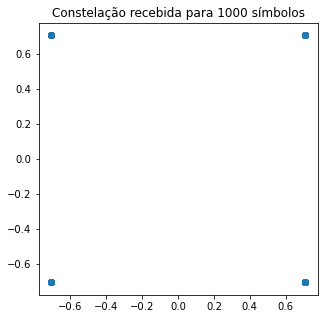

In [7]:
print("Ocorreram", erros, "erros de símbolo")

plt.figure(figsize= (5,5))
plt.scatter(C.real, C.imag)
plt.title(f'Constelação recebida para {N} símbolos')
plt.show()